In [23]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [7]:
atp_data <- read_csv('Data/atp2017-2019.csv')
atp_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NA,⋯,54,44,13,14,7,10,7,3775,15,2320
2885,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,5,106298,NA,⋯,53,29,11,11,4,11,18,2235,76,667


In [14]:
ace_data <- atp_data |>
    select(match_num, winner_id, winner_seed, winner_hand, winner_rank, winner_rank_points, w_ace, w_svpt, w_SvGms, loser_id, loser_seed, loser_hand, l_ace, l_svpt, l_SvGms, loser_rank, loser_rank_points)
ace_data

match_num,winner_id,winner_seed,winner_hand,winner_rank,winner_rank_points,w_ace,w_svpt,w_SvGms,loser_id,loser_seed,loser_hand,l_ace,l_svpt,l_SvGms,loser_rank,loser_rank_points
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
300,105453,2,R,9,3590,3,77,13,106421,4,R,8,100,14,16,1977
299,106421,4,R,16,1977,10,52,10,104542,NA,R,17,77,10,239,200
298,105453,2,R,9,3590,2,47,8,104871,NA,R,10,46,8,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,104542,NA,R,15,2320,12,64,12,104327,NA,R,1,81,12,76,667
4,105676,NA,R,7,3775,1,122,15,104542,NA,R,10,88,14,15,2320
5,106298,NA,R,18,2235,7,57,11,104327,NA,R,1,87,11,76,667


 Can the amount of aces in a match for a player be predicted by using only the history of that player, or does it depend on the opponent as well?

In [30]:
winner_history <- ace_data |>
    group_by(winner_id) |>
    summarize(w_svpt_avg = mean(w_svpt, na.rm = TRUE)) 
winner_history

winner_id,w_svpt_avg
<dbl>,<dbl>
100644,75.86957
103333,90.25000
103819,71.40769
⋮,⋮
200615,88.92308
205734,85.00000
206173,67.00000


Rank doesn't seem to be correlated with number of aces

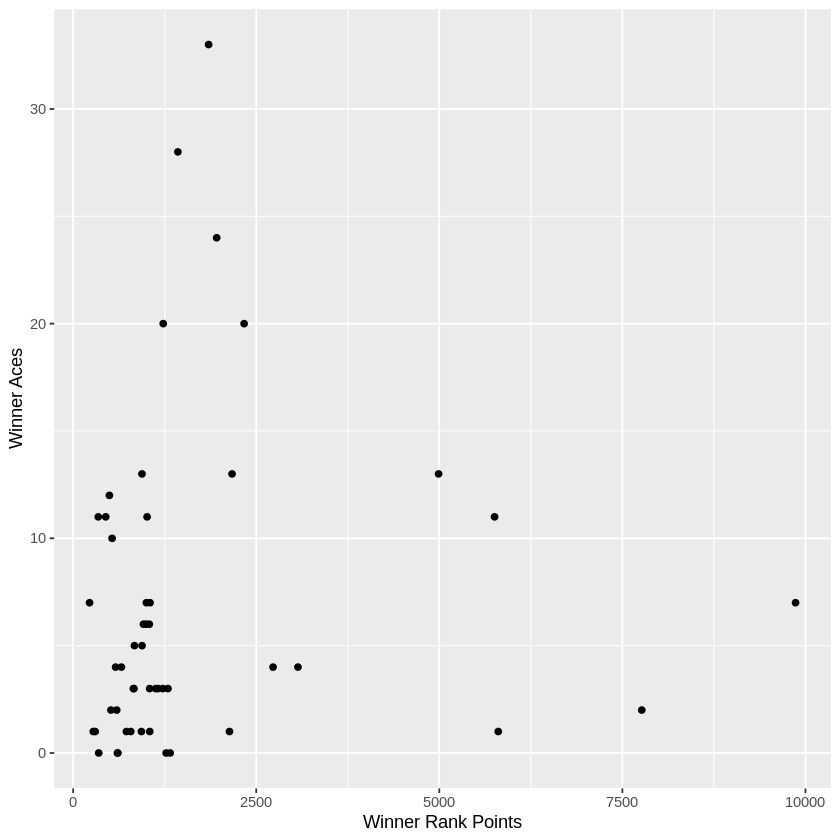

In [28]:
aces_w_50 <- ace_data |>
    sample_n(50)
aces_w_50_plot <- aces_w_50 |>
    ggplot(aes(x = winner_rank_points, y = w_ace)) +
    geom_point() +
    labs(x = 'Winner Rank Points', y = 'Winner Aces')
aces_w_50_plot

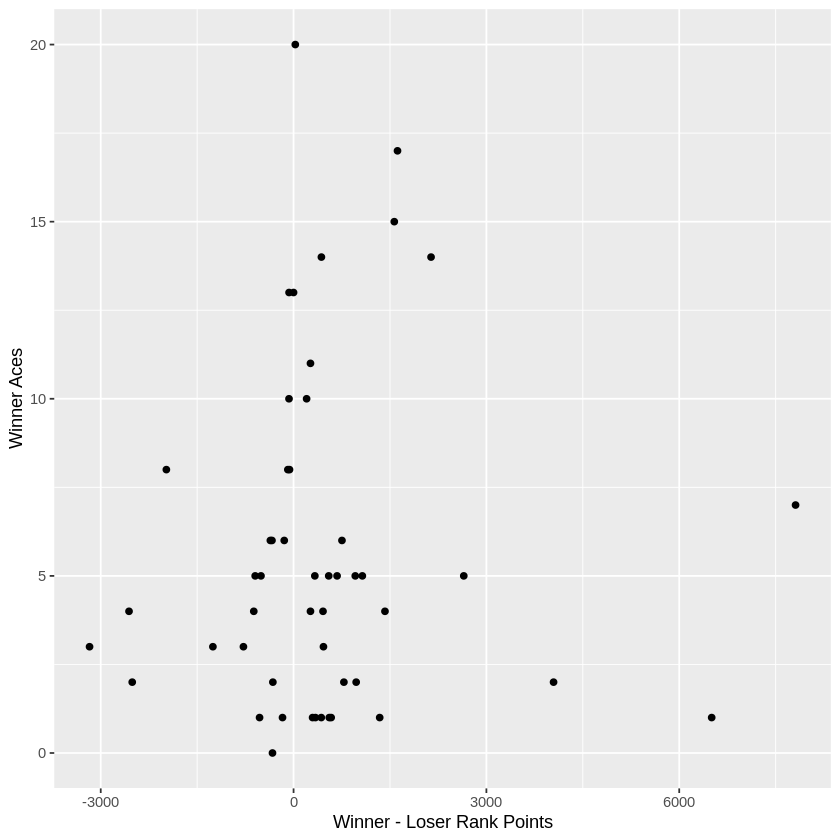

In [31]:
aces_w_50 <- ace_data |>
    sample_n(50)
aces_w_50_plot_2 <- aces_w_50 |>
    ggplot(aes(x = winner_rank_points - loser_rank_points, y = w_ace)) +
    geom_point() +
    labs(x = 'Winner - Loser Rank Points', y = 'Winner Aces')
aces_w_50_plot_2